In [2]:
import pandas as pd
import numpy as np

## Post-Process Data

In [5]:
data = pd.read_csv("./output.csv")

In [6]:
data

,UUID,Timestamp,x,y,z
0,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.05,-3.93169,-3.00108,0.532280
1,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.15,-3.92803,-2.98633,0.517843
2,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.25,-3.93200,-2.97105,0.520105
3,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.35,-3.92516,-2.96786,0.522445
4,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.45,-3.91112,-2.97678,0.524931
...,...,...,...,...,...
2487,6b33aebaf166f4a8a6d11539f8ded85d,13723.51,-6.03284,-2.14886,0.138918
2488,73f168b158d12502bfd65b7fefe776b8,13723.51,-6.52298,-2.75643,0.132915
2489,a01e81573b3ca2ec1c4504dd49c7c672,13723.51,-4.00916,-3.11809,0.091160
2490,43c969d74ef4a14a05b88e5bf64fe555,13723.51,-5.51790,-1.21970,0.183482


In [20]:
user_position_list = {}
for i in range(13680, 13724):
    filtered_data = data[(data['Timestamp'] >= i) & (data['Timestamp'] < i + 1)]
    dropped_filtered_data = filtered_data.drop_duplicates(subset='UUID', keep='first')

    for index, row in dropped_filtered_data.iterrows():
        user_position_list[row['UUID']] = {row['Timestamp']:[row['x'], row['y'], row['z']]}

In [19]:
i = 13680
filtered_data = data[(data['Timestamp'] >= i) & (data['Timestamp'] < i + 1)]
dropped_filtered_data = filtered_data.drop_duplicates(subset='UUID', keep='first')
dropped_filtered_data

,UUID,Timestamp,x,y,z
0,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.050,-3.93169,-3.001080,0.532280
9,984917491cbf7b7feb65d794fee57dc7,13680.851,-4.42574,-0.521871,0.073672


## Visualize Data

In [34]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation
from IPython.display import HTML

TypeError: 'Text' object is not iterable

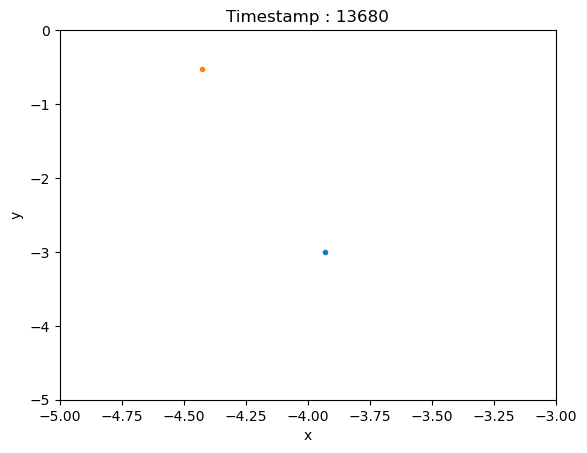

In [39]:
fig, ax = plt.subplots()


frames = []

for i in range(13680, 13724):
    filtered_data = data[(data['Timestamp'] >= i) & (data['Timestamp'] < i + 1)]
    dropped_filtered_data = filtered_data.drop_duplicates(subset='UUID', keep='first')

    artists = []
    for index, row in dropped_filtered_data.iterrows():
        user_position_list[row['UUID']] = {row['Timestamp']:[row['x'], row['y'], row['z']]}
        artist = ax.plot(row['x'], row['y'], '.')
        artists.extend(artist)
        
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-5, -3)
    ax.set_ylim(-5, 0)
    title = ax.set_title("Timestamp : {}".format(i))
    artists.extend(title)
    
    frames.append(artists)
ani = ArtistAnimation(fig, frames, interval = 10)
ani.save('./animation.gif', writer="pillow")
plt.close()

In [28]:
data

,UUID,Timestamp,x,y,z
0,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.05,-3.93169,-3.00108,0.532280
1,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.15,-3.92803,-2.98633,0.517843
2,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.25,-3.93200,-2.97105,0.520105
3,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.35,-3.92516,-2.96786,0.522445
4,8ba004c922a9b7f4b9da8c4b63ccae8d,13680.45,-3.91112,-2.97678,0.524931
...,...,...,...,...,...
2487,6b33aebaf166f4a8a6d11539f8ded85d,13723.51,-6.03284,-2.14886,0.138918
2488,73f168b158d12502bfd65b7fefe776b8,13723.51,-6.52298,-2.75643,0.132915
2489,a01e81573b3ca2ec1c4504dd49c7c672,13723.51,-4.00916,-3.11809,0.091160
2490,43c969d74ef4a14a05b88e5bf64fe555,13723.51,-5.51790,-1.21970,0.183482
